> __Purpose:__ This NB visualizes the results of the full study for ELEC573Net. Will be adding different feature engineerings here.

In [1]:
import numpy as np
import copy
#from sklearn.preprocessing import LabelEncoder
#import matplotlib.pyplot as plt
#import pandas as pd

np.random.seed(42) 

from agglo_model_clust import *
from cluster_acc_viz_funcs import *
from DNN_FT_funcs import *
from DNN_AMC_funcs import *
from full_study_funcs import * 
from revamped_model_classes import *
from hyperparam_tuned_configs import *

import os
cwd = os.getcwd()
print("Current Working Directory: ", cwd)


Current Working Directory:  c:\Users\kdmen\Repos\fl-gestures\ELEC573_Proj


In [2]:
MODEL_STR = "ELEC573Net"
MY_CONFIG = ELEC573Net_config
SAVE_FIGS = False
NUM_MONTE_CARLO_RUNS = 10
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

# Train/test user split: 24/8
## Is this part of config now? The split number?
## No it is hardcoded below...
NUM_PRETRAIN_USERS = 24
NUM_FT_USERS = 8



In [3]:
FS_CONFIG = copy.deepcopy(MY_CONFIG)
FS_CONFIG["feature_engr"] = "FS"
FS_CONFIG["num_channels"] = 184
FS_CONFIG["sequence_length"] = 1

In [4]:
expdef_df = load_expdef_gestures(feateng_method=FS_CONFIG["feature_engr"])

print(expdef_df.shape)
expdef_df.head()

(3200, 6)


,Participant,Gesture_ID,Gesture_Num,feature,Gesture_Encoded,Cluster_ID
0,P004,close,1,"[6.930351855222173, 42.70223271063775, 980.842...",0,0
1,P004,close,10,"[6.370354910538912, 37.39770900878845, 759.437...",0,0
2,P004,close,2,"[6.469240114625251, 38.83206752657385, 877.013...",0,0
3,P004,close,3,"[5.355227032380038, 40.38423665963291, 900.786...",0,0
4,P004,close,4,"[6.243496479273723, 37.40525284775207, 764.636...",0,0


In [5]:
import json
# Load the fixed user splits
with open("24_8_user_splits.json", "r") as f:
    splits = json.load(f)
all_participants = splits["all_users"]
test_participants = splits["test_users"]


## Using Wiki Time Series Feature Engineering (FS)

In [6]:
# Load the CLUSTERING RESULTS DATA
with open('C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\results\\clustering_models\\20250212_1807\\FS184_ELEC573Net_agglo_merge_res.pkl', 'rb') as f:
    merge_log = pickle.load(f)
    intra_cluster_performance = pickle.load(f)
    cross_cluster_performance = pickle.load(f)
    nested_clus_model_dict = pickle.load(f)

full_path = "C:\\Users\\kdmen\\Repos\\fl-gestures\\ELEC573_Proj\\models\\20250212_1759"
print("Full Path:", full_path)
# Load the pretrained model
pretrained_generic_model = ELEC573Net(FS_CONFIG)
pretrained_generic_model.load_state_dict(torch.load(full_path+"\\FS184_pretrained_ELEC573Net_model.pth"))

Full Path: C:\Users\kdmen\Repos\fl-gestures\ELEC573_Proj\models\20250212_1759


<All keys matched successfully>

In [7]:
lst_of_res_dicts_oneshot = [0]*NUM_MONTE_CARLO_RUNS
for i in range(NUM_MONTE_CARLO_RUNS):

    # Prepare data
    ## Unknown determenism / stochasticity...
    ## Some randomness from the 8/2 and 3/7 splits, namely which gestures get included...
    data_splits = prepare_data(
        expdef_df, 'feature', 'Gesture_Encoded', 
        all_participants, test_participants, 
        training_trials_per_gesture=8, finetuning_trials_per_gesture=3,
    )

    # Fit LabelEncoder once on all participant IDs for consistency
    all_participant_ids = data_splits['train']['participant_ids'] + data_splits['intra_subject_test']['participant_ids']
    label_encoder = LabelEncoder()
    label_encoder.fit(all_participant_ids)

    # Process train and test sets
    train_df = process_split(data_splits, 'train', label_encoder)
    test_df = process_split(data_splits, 'intra_subject_test', label_encoder)
    data_dfs_dict = {'train':train_df, 'test':test_df}

    # Prepare data
    one_trial_data_splits = prepare_data(
        expdef_df, 'feature', 'Gesture_Encoded', 
        all_participants, test_participants, 
        training_trials_per_gesture=1, finetuning_trials_per_gesture=1,
    )
    #five_trial_data_splits = prepare_data(
    #    expdef_df, 'feature', 'Gesture_Encoded', 
    #    all_participants, test_participants, 
    #    training_trials_per_gesture=5, finetuning_trials_per_gesture=5,
    #)

    # data_dict_1_1
    lst_of_res_dicts_oneshot[i] = full_comparison_run(one_trial_data_splits, one_trial_data_splits, FS_CONFIG, pretrained_generic_model,
                            nested_clus_model_dict, MODEL_STR, cluster_iter_str='Iter18')


PID P010, 1/8
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Cluster 43 had the highest accuracy (0.4)
PID P102, 2/8
Cluster 43 had the highest accuracy (0.3)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
PID P104, 3/8
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Cluster 43 had the highest accuracy (0.2)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
PID P108, 4/8
Cluster 43 had the highest accuracy (0.2)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
PID P121, 5/8
Cluster 45 had the highest accuracy (0.2)
PID P123, 6/8
Epoch 00019: reducing learning rate of group 0 to 1.0000e-06.
Cluster 45 had the highest accuracy (0.3)
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
PID P124, 7/8
Epoch 00006: reducing learning rate of group 0 to 1.0000e-06.
Cluster 43 had the highest accuracy (0.2)
Epoch 00014: reducing learning rate of group 0 to 1.0000e-06.
PID P128, 8/8
Cluster 49 had the highest accuracy 

In [8]:
fs_data_dict_1_1 = {}    
fs_data_dict_1_1['local_acc_data'] = np.zeros(NUM_FT_USERS, dtype=np.float32)
fs_data_dict_1_1['centralized_acc_data'] = np.zeros(NUM_FT_USERS, dtype=np.float32)
fs_data_dict_1_1['ft_centralized_acc_data'] = np.zeros(NUM_FT_USERS, dtype=np.float32)
fs_data_dict_1_1['pretrained_cluster_acc_data'] = np.zeros(NUM_FT_USERS, dtype=np.float32)
fs_data_dict_1_1['ft_cluster_acc_data'] = np.zeros(NUM_FT_USERS, dtype=np.float32)

for idx, res_dict in enumerate(lst_of_res_dicts_oneshot):
    fs_data_dict_1_1['local_acc_data'] += np.array(res_dict['local_acc_data'])
    fs_data_dict_1_1['centralized_acc_data'] += np.array(res_dict['centralized_acc_data'])
    fs_data_dict_1_1['ft_centralized_acc_data'] += np.array(res_dict['ft_centralized_acc_data'])
    fs_data_dict_1_1['pretrained_cluster_acc_data'] += np.array(res_dict['pretrained_cluster_acc_data'])
    fs_data_dict_1_1['ft_cluster_acc_data'] += np.array(res_dict['ft_cluster_acc_data'])

fs_data_dict_1_1['local_acc_data'] /= (idx+1)
fs_data_dict_1_1['centralized_acc_data'] /= (idx+1)
fs_data_dict_1_1['ft_centralized_acc_data'] /= (idx+1)
fs_data_dict_1_1['pretrained_cluster_acc_data'] /= (idx+1)
fs_data_dict_1_1['ft_cluster_acc_data'] /= (idx+1)

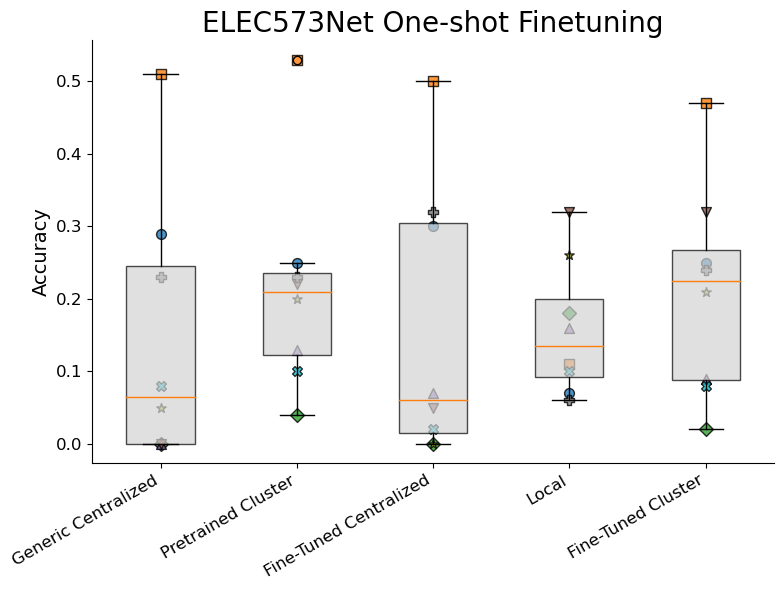

In [9]:
plot_model_acc_boxplots(fs_data_dict_1_1, my_title=f"{MODEL_STR} One-shot Finetuning", save_fig=False, plot_save_name=f"Final_{MODEL_STR}_Acc_1TA_1TT")